<a href="https://colab.research.google.com/github/rtajeong/M3/blob/main/lab45_opencv_digits_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 손글씨 숫자 인식
- 8x8 픽셀 숫자 데이터 5620개 사용

In [ ]:
import cv2
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
digits = datasets.load_digits()   # 8x8 pixels

In [ ]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [ ]:
digits.target, digits.target_names

(array([0, 1, 2, ..., 8, 9, 8]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [ ]:
digits.data[0], digits.images[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]))

In [ ]:
digits.target[0]

0

In [ ]:
digits.data[0].shape, digits.images[0].shape, digits.target[0], digits.target_names[0]

((64,), (8, 8), 0, 0)

In [ ]:
print(digits.data.shape)
print(digits.images.shape)
print(digits.target.shape)
print(digits.target_names.shape)

(1797, 64)
(1797, 8, 8)
(1797,)
(10,)


In [ ]:
digits.data[9]

array([ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
       13.,  0.,  0.,  0.,  3., 16., 12., 10., 14.,  0.,  0.,  0.,  1.,
       16.,  1., 12., 15.,  0.,  0.,  0.,  0., 13., 16.,  9., 15.,  2.,
        0.,  0.,  0.,  0.,  3.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,
        9., 15.,  4.,  0.,  0.,  0.,  9., 12., 13.,  3.,  0.,  0.])

In [ ]:
digits.images[9]

array([[ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  2., 16., 16., 16., 13.,  0.,  0.],
       [ 0.,  3., 16., 12., 10., 14.,  0.,  0.],
       [ 0.,  1., 16.,  1., 12., 15.,  0.,  0.],
       [ 0.,  0., 13., 16.,  9., 15.,  2.,  0.],
       [ 0.,  0.,  0.,  3.,  0.,  9., 11.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 15.,  4.,  0.],
       [ 0.,  0.,  9., 12., 13.,  3.,  0.,  0.]])

0

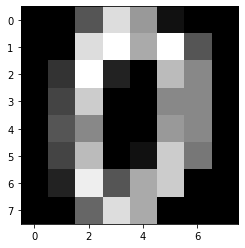

In [ ]:
plt.imshow(digits.images[0], cmap='gray')
digits.target[0]

In [ ]:
digits.data.max(), digits.data.min()

(16.0, 0.0)

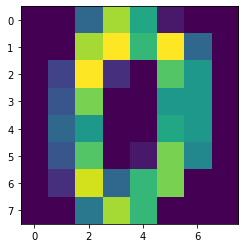

In [ ]:
plt.imshow(digits.images[0])

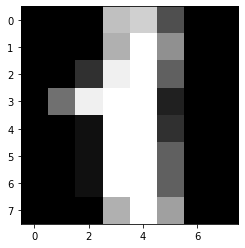

In [ ]:
plt.imshow(digits.images[1], cmap="gray")
plt.show()

In [ ]:
# 각 픽셀은 0~15의 숫자로 표현된다, 크면 밝은 색 ( 0 ~ 16 )
print(digits.images[1])

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


In [ ]:
digits.target[:15]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

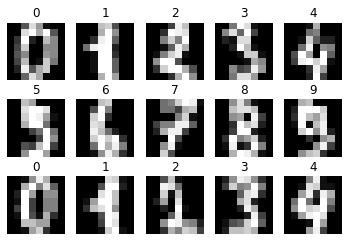

In [ ]:
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.axis("off")
    plt.title(str(digits.target[i]))
    plt.imshow(digits.images[i], cmap="gray")

plt.show()

In [ ]:
x = digits.images
x = x.reshape((-1, 64))    # same data as digits.data 
x[0] == digits.data[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
x.shape, digits.data.shape

((1797, 64), (1797, 64))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.metrics import accuracy_score
import numpy as np

# np.random.seed(42)
x = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

clf = svm.SVC(max_iter=2000)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.9888888888888889


### Persistance:
- joblib.dump() and joblib.load() provide a replacement for pickle to work efficiently on arbitrary Python objects containing large data, in particular large numpy arrays.
- 학습한 모델 파라미터를 피클 형식으로 저장한다. 피클처럼 오래 저장한다는 의미.

In [ ]:
# 학습한 데이터 (object) 저장하기
from sklearn.externals import joblib
joblib.dump(clf, 'digits.pkl')

['digits.pkl']

In [ ]:
def predict_digit(filename):
    model = joblib.load("digits.pkl")  # 학습한 데이터 읽어 들이기
    
    my_img = cv2.imread(filename)
    plt.imshow(cv2.cvtColor(my_img,cv2.COLOR_BGR2RGB))
    plt.show()
    
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    plt.imshow(cv2.cvtColor(my_img,cv2.COLOR_BGR2RGB))
    plt.show()
    
    my_img = cv2.resize(my_img, (8, 8))
    plt.imshow(cv2.cvtColor(my_img,cv2.COLOR_BGR2RGB))
    plt.show()
    
    # my_img = 15 - my_img // 16      # // is floor division (7//2=3, -7//2=-4)
    my_img = 15 - (my_img // 16)
    # 흑백 반전
    plt.imshow(my_img, cmap="gray")
    plt.show()
    
    my_img = my_img.reshape((-1, 64))
    res = model.predict(my_img)
    return res[0]

In [ ]:
# !dir *.png

In [ ]:
# 이미지 파일을 지정해서 실행하기
# 미리보기에서 클립보드에서 파일로 저장 실행
# 이미지 그리기도 미리보기에서 가능함
img = cv2.imread("num_6.png")
n = predict_digit("num_6.png")
print("num_6.png = " + str(n))

error: ignored

In [ ]:
img = cv2.imread("img_num3.png")
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("img_num3.png")
print("img_num3.png = " + str(n))
plt.show()

In [ ]:
img = cv2.imread("img_num9.png")
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
n = predict_digit("img_num9.png")
print("img_num9.png = " + str(n))
plt.show()